In [ ]:
!pip install transformers accelerate datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
from transformers import AutoImageProcessor, Swinv2ForImageClassification,SwinModel


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_path = "/content/drive/MyDrive/SwinV2L_MoroccanBirds_Finale"

image_processor = AutoImageProcessor.from_pretrained(model_path)
model = Swinv2ForImageClassification.from_pretrained(model_path)

In [ ]:
!unzip "/content/drive/MyDrive/MorrocanClassifier/test.zip" -d "/content/MoroccanData"

Streaming output truncated to the last 5000 lines.
  inflating: /content/MoroccanData/content/test/Common Redshank/Common_Redshank_0_156_0_924_768_-_g_0469.jpg  
  inflating: /content/MoroccanData/content/test/Common Redshank/Common_Redshank_0_130_59_659_588_-_f_0399.jpg  
  inflating: /content/MoroccanData/content/test/Common Redshank/Common_Redshank_0_163_119_834_791_-_e_0337.jpg  
  inflating: /content/MoroccanData/content/test/Common Redshank/Common_Redshank_0_144_-28_701_528_-_f_0179.jpg  
  inflating: /content/MoroccanData/content/test/Common Redshank/Common_Redshank_0_-22_136_733_893_-_g_0264.jpg  
  inflating: /content/MoroccanData/content/test/Common Redshank/Common_Redshank_0_0_-51_847_796_-_f_1370.jpg  
  inflating: /content/MoroccanData/content/test/Common Redshank/Common_Redshank_0_161_34_720_593_-_g_0366.jpg  
  inflating: /content/MoroccanData/content/test/Common Redshank/Common_Redshank_0_148_1_764_617_-_f_1030.jpg  
  inflating: /content/MoroccanData/content/test/Commo

In [ ]:
from transformers import AutoImageProcessor, Swinv2ForImageClassification
import torch
from datasets import load_dataset
from transformers import ViTImageProcessor

# image = dataset["test"]["image"][0]

DATASET_DIR = '/content/MoroccanData/content'
dataset = load_dataset(name="SwinV2_MoroccanBirds", path=DATASET_DIR, data_files={"test": "/content/MoroccanData/content/test/**"})

labels = dataset['test'].features['label'].names
feature_extractor = ViTImageProcessor.from_pretrained(model_path)


def transform(example_batch):
    inputs = feature_extractor([x.convert("RGB") for x in example_batch['image']], return_tensors='pt')

    inputs['labels'] = example_batch['label']
    return inputs

prepared_ds = dataset.with_transform(transform)

Resolving data files:   0%|          | 0/22290 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
predicted_label = logits.argmax(-1).item()
predicted_probabilities = torch.softmax(logits, dim=-1)[0]
label=model2.config.id2label[predicted_label]

In [ ]:
model.base_model.named_parameters

<bound method Module.named_parameters of Swinv2Model(
  (embeddings): Swinv2Embeddings(
    (patch_embeddings): Swinv2PatchEmbeddings(
      (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
    )
    (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): Swinv2Encoder(
    (layers): ModuleList(
      (0): Swinv2Stage(
        (blocks): ModuleList(
          (0-1): 2 x Swinv2Layer(
            (attention): Swinv2Attention(
              (self): Swinv2SelfAttention(
                (continuous_position_bias_mlp): Sequential(
                  (0): Linear(in_features=2, out_features=512, bias=True)
                  (1): ReLU(inplace=True)
                  (2): Linear(in_features=512, out_features=3, bias=False)
                )
                (query): Linear(in_features=96, out_features=96, bias=True)
                (key): Linear(in_features=96, out_features=96, bias=False)
                (value): Line

In [ ]:
image_processor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 256,
    "width": 256
  }
}

In [ ]:
print(model2)

# Alternatively, you can iterate through the layers
for name, param in model2.named_parameters():
    print(f"Layer: {name} | Size: {param.size()}")

Swinv2ForImageClassification(
  (swinv2): Swinv2Model(
    (embeddings): Swinv2Embeddings(
      (patch_embeddings): Swinv2PatchEmbeddings(
        (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): Swinv2Encoder(
      (layers): ModuleList(
        (0): Swinv2Stage(
          (blocks): ModuleList(
            (0-1): 2 x Swinv2Layer(
              (attention): Swinv2Attention(
                (self): Swinv2SelfAttention(
                  (continuous_position_bias_mlp): Sequential(
                    (0): Linear(in_features=2, out_features=512, bias=True)
                    (1): ReLU(inplace=True)
                    (2): Linear(in_features=512, out_features=3, bias=False)
                  )
                  (query): Linear(in_features=96, out_features=96, bias=True)
                  (key): Linear(in_features=96, out_features=96

In [ ]:
from PIL import Image
image_path = "/content/test_ImageToEnhance.jpg"
image = Image.open(image_path)
image = image_processor(image, return_tensors="pt")
out=model.base_model.forward(**image)
#image_tensor = model2.config.image_builder(image).unsqueeze(0)
#emb=Feature(**image)
# output4=model4(**image)
# LL = output4.last_hidden_state
# list(LL.output4)
# sample = model2.forward_features(torch.randn(1, 3, 256, 256))
# last_hidden_states = outputs.last_hidden_state
# last_hidden_states.shape



In [ ]:
import torch
layers = list(model2.children())[-7]

# Create a new sequential model with the desired layers
new_model = torch.nn.Sequential(*layers)

# Print the new model architecture
print(new_model)


Sequential()


In [ ]:
!git clone https://github.com/sberbank-ai/Real-ESRGAN
%cd Real-ESRGAN

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 96 (delta 6), reused 5 (delta 5), pack-reused 81
Unpacking objects: 100% (96/96), 10.16 MiB | 5.52 MiB/s, done.
/content/Real-ESRGAN


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 15.6 MB/s eta 0:00:00


In [ ]:
!pip install supervision==0.1.0 ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.4/595.4 kB 24.0 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import supervision
import ultralytics
import torch


ultralytics.checks()

from ultralytics import YOLO

from supervision.draw.color import ColorPalette
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator
from supervision.video.source import get_video_frames_generator
from supervision.notebook.utils import show_frame_in_notebook

from transformers import AutoImageProcessor, Swinv2ForImageClassification
from datasets import load_dataset


print("supervision.__version__:", supervision.__version__)

Ultralytics YOLOv8.0.114 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


supervision.__version__: 0.1.0


In [ ]:
import torch
from PIL import Image
import numpy as np
from RealESRGAN import RealESRGAN

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Enhance = RealESRGAN(device, scale=4)
Enhance.load_weights('weights/RealESRGAN_x4.pth')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:649: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


Weights downloaded to: weights/RealESRGAN_x4.pth


In [ ]:
import shutil

# Set the source and destination paths
source_folder = '/content/drive/MyDrive/Bird Classification'
destination_folder = '/content/Bird'

# Copy the folder
shutil.copytree(source_folder, destination_folder)

'/content/Bird'

In [ ]:
import cv2
import numpy as np
import supervision
import ultralytics
import torch
import matplotlib.pyplot as plt

ultralytics.checks()

from cv2 import dnn_superres

from ultralytics import YOLO

from supervision.draw.color import ColorPalette
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator
from supervision.video.source import get_video_frames_generator
from supervision.notebook.utils import show_frame_in_notebook

from transformers import AutoImageProcessor, Swinv2ForImageClassification
from datasets import load_dataset
import pandas as pd
from google.colab.patches import cv2_imshow

%cd "/content"
SOURCE_VIDEO_PATH = "/content/Bird/bird2.mp4"
MODEL = "/content/Bird/best78.pt"


model = YOLO(MODEL)
model.fuse()

box_annotator = BoxAnnotator(color=ColorPalette(), thickness=3, text_thickness=3, text_scale=1)
CLASS_NAMES_DICT = model.model.names

generator = get_video_frames_generator(SOURCE_VIDEO_PATH)

# acquire first video frame
iterator = iter(generator)
frame_num = 0

Ultralytics YOLOv8.0.114 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


/content


WARNING ⚠️ /content/Bird/best78.pt appears to require 'omegaconf', which is not in ultralytics requirements.
AutoInstall will run now for 'omegaconf' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement "omegaconf" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 153.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=ad40608f19985a411e4de75a6916c52c01d8795072d64fd7821be4617bcd12f4
  


0: 384x640 19 birds, 70.3ms
Speed: 13.9ms preprocess, 70.3ms inference, 36.2ms postprocess per image at shape (1, 3, 640, 640)
/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(




THIS IS FRAME 1
Predicted Label: Wilson's Phalarope
Confidence: 3.994739055633545%


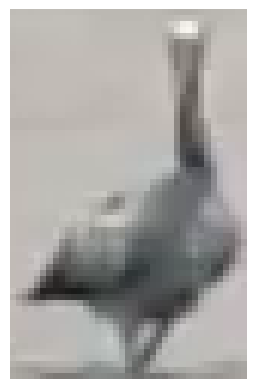


Predicted Label: Mute Swan
Confidence: 14.920996129512787%


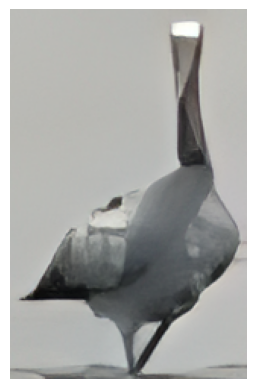



Predicted Label: Pied Avocet
Confidence: 6.728990375995636%


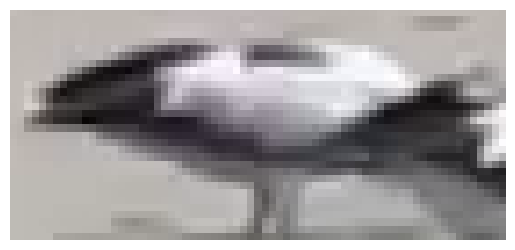


Predicted Label: Pied Avocet
Confidence: 11.837230622768402%


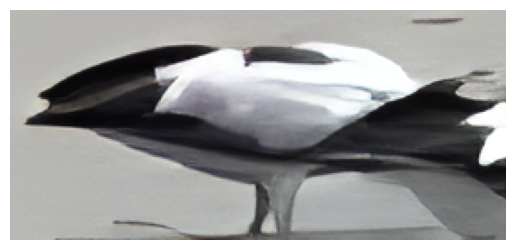



Predicted Label: Demoiselle Crane
Confidence: 4.109949991106987%


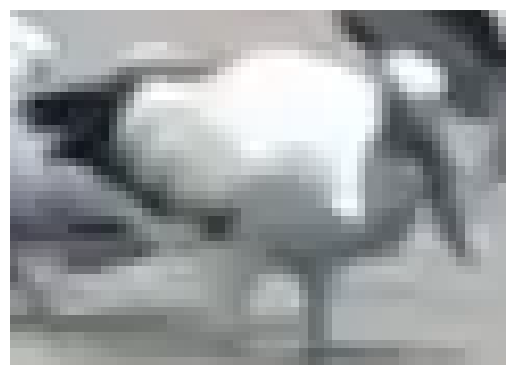


Predicted Label: Demoiselle Crane
Confidence: 52.946317195892334%


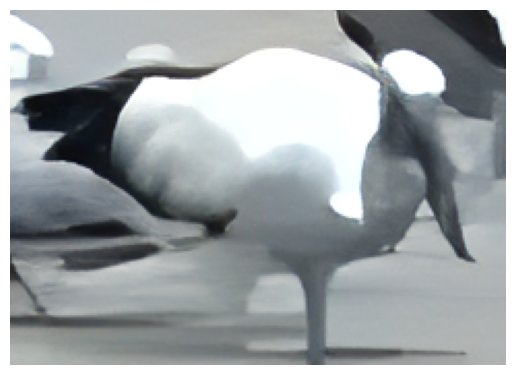



Predicted Label: Masked Booby
Confidence: 6.455126404762268%


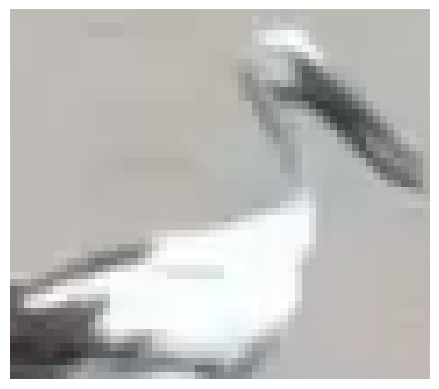


Predicted Label: Pied Avocet
Confidence: 9.859233349561691%


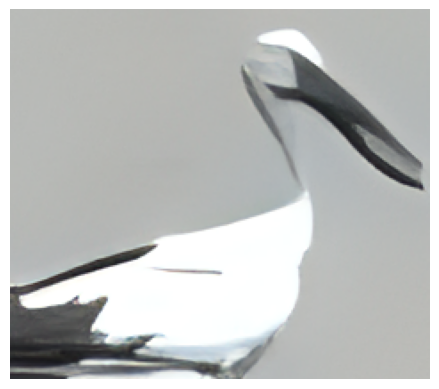



Predicted Label: Common Murre
Confidence: 4.547556862235069%


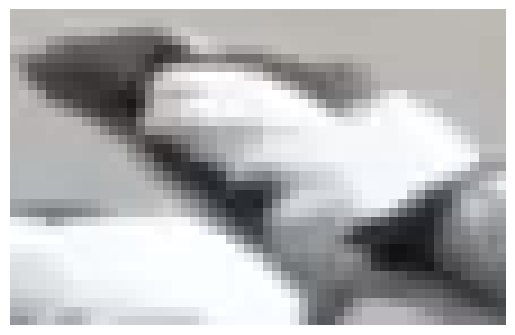


Predicted Label: Razorbill
Confidence: 13.609258830547333%


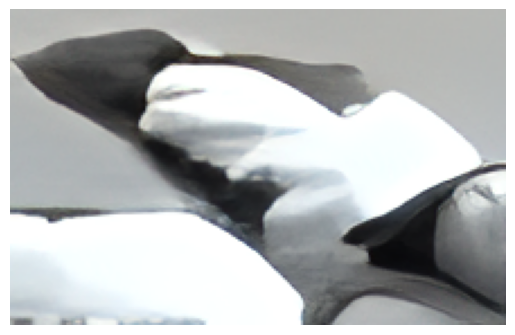



Predicted Label: Franklin's Gull
Confidence: 4.319358244538307%


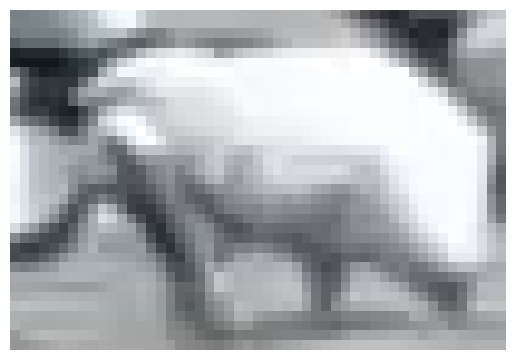


Predicted Label: Demoiselle Crane
Confidence: 76.6068160533905%


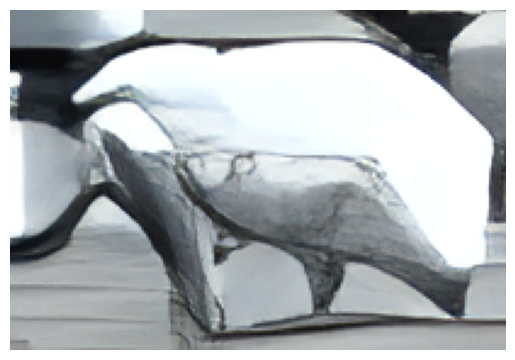



Predicted Label: Snow Goose
Confidence: 6.636582314968109%


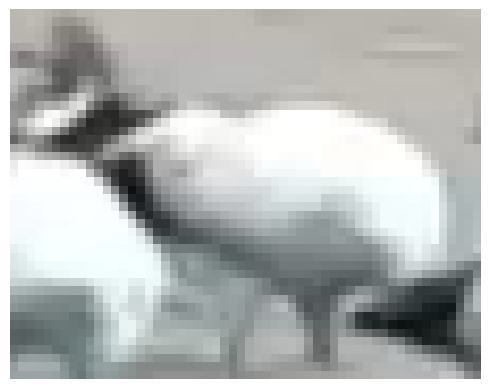


Predicted Label: Snow Goose
Confidence: 30.052798986434937%


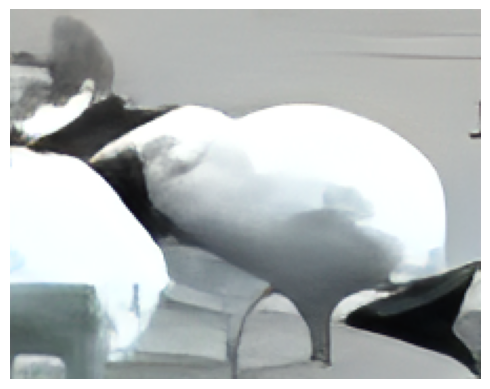



Predicted Label: Demoiselle Crane
Confidence: 7.59374275803566%


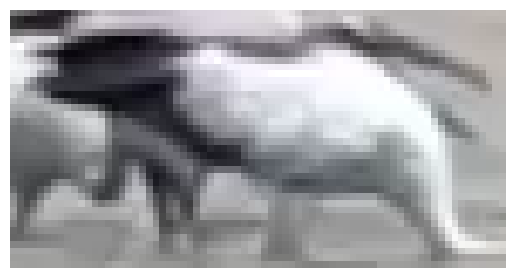


Predicted Label: Demoiselle Crane
Confidence: 12.489345669746399%


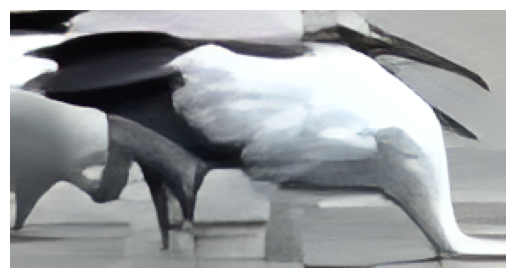



Predicted Label: Wilson's Phalarope
Confidence: 5.649124830961227%


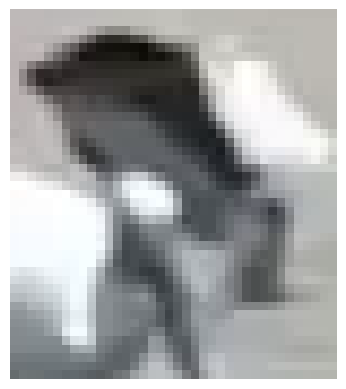


Predicted Label: Kelp Gull
Confidence: 15.663845837116241%


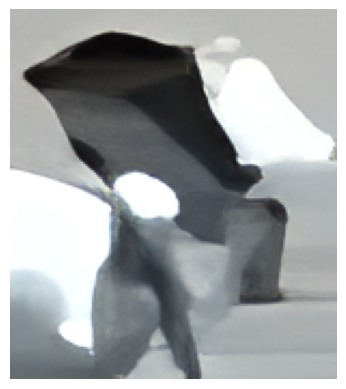



Predicted Label: Sabine's Gull
Confidence: 7.189799100160599%


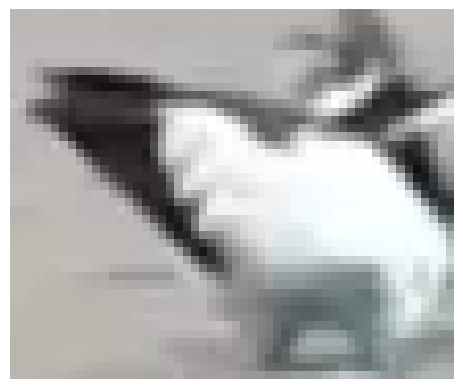


Predicted Label: Snow Goose
Confidence: 13.075430691242218%


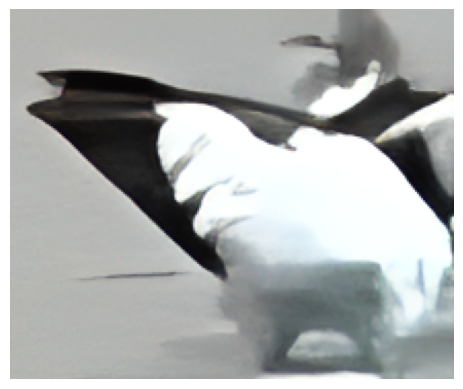



Predicted Label: Razorbill
Confidence: 10.121095180511475%


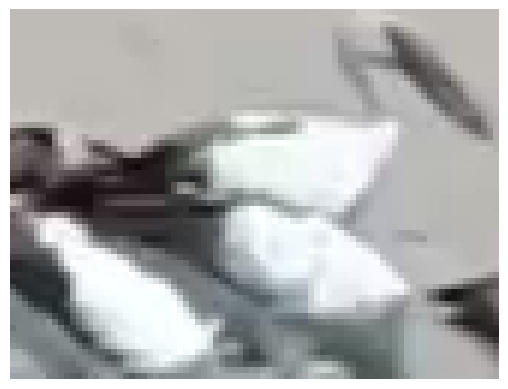


Predicted Label: Razorbill
Confidence: 15.10646939277649%


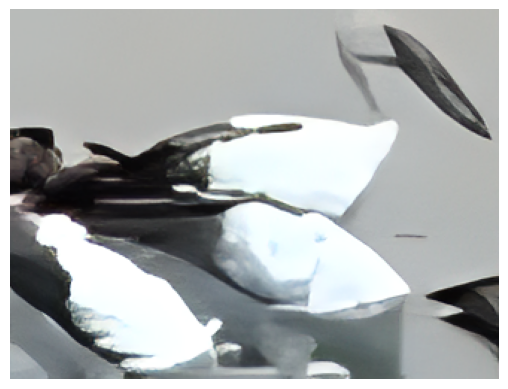



Predicted Label: Common Murre
Confidence: 4.329315572977066%


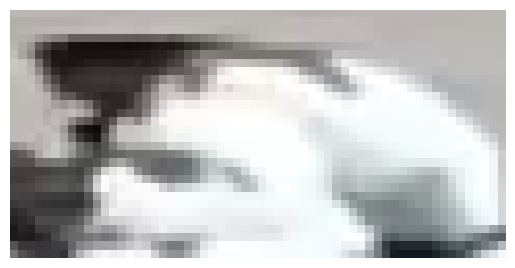


Predicted Label: Kelp Gull
Confidence: 7.677142322063446%


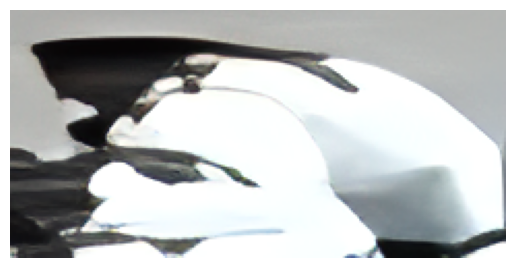



Predicted Label: Snow Goose
Confidence: 11.442673206329346%


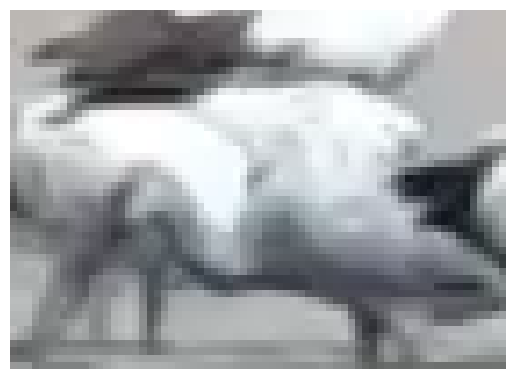


Predicted Label: Snow Goose
Confidence: 18.545861542224884%


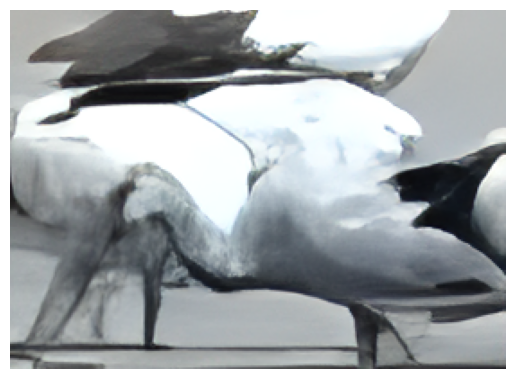



Predicted Label: Snow Goose
Confidence: 7.2440005838871%


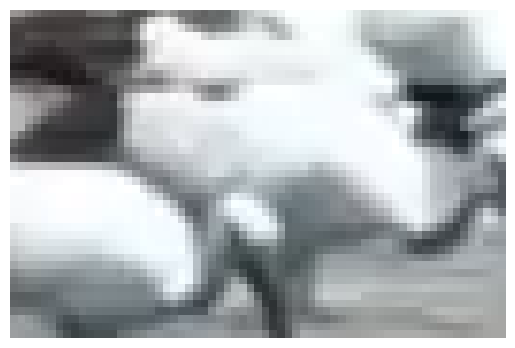


Predicted Label: Whooper Swan
Confidence: 23.19573014974594%


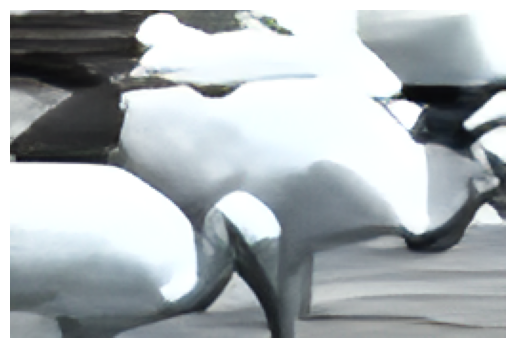



Predicted Label: Black-headed Gull
Confidence: 5.221544951200485%


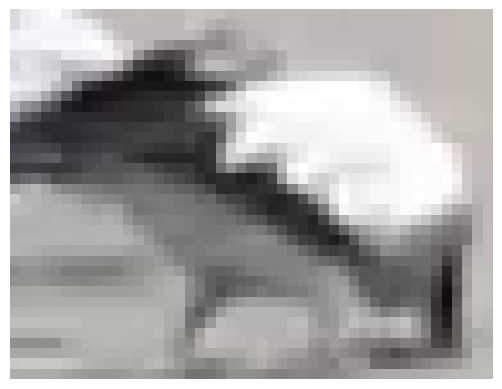


Predicted Label: Snow Goose
Confidence: 6.814552843570709%


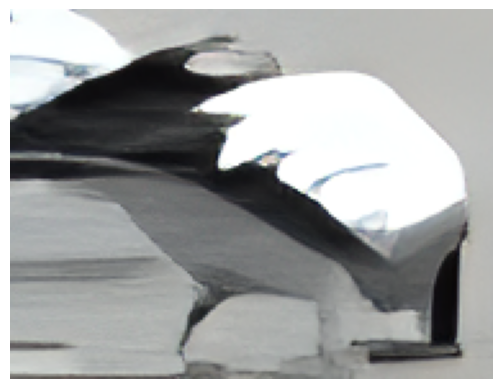



Predicted Label: Snow Goose
Confidence: 10.180655866861343%


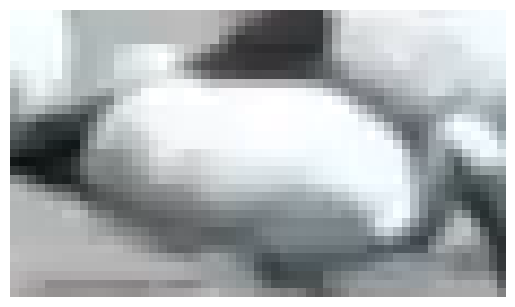


Predicted Label: Whooper Swan
Confidence: 40.22439122200012%


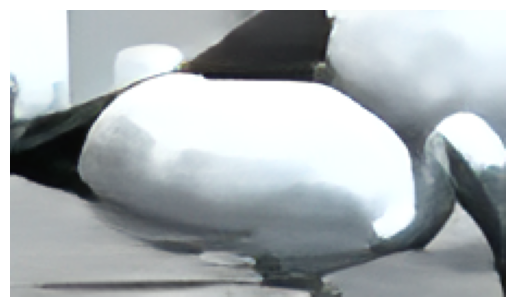



Predicted Label: Yellow-legged Gull
Confidence: 5.560465529561043%


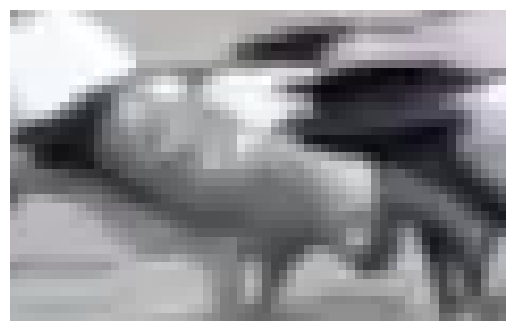


Predicted Label: Snow Goose
Confidence: 16.90441071987152%


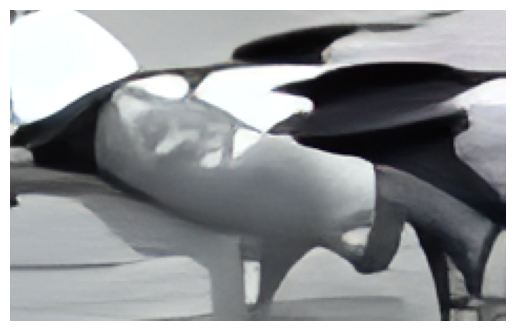



Predicted Label: Franklin's Gull
Confidence: 7.3336102068424225%


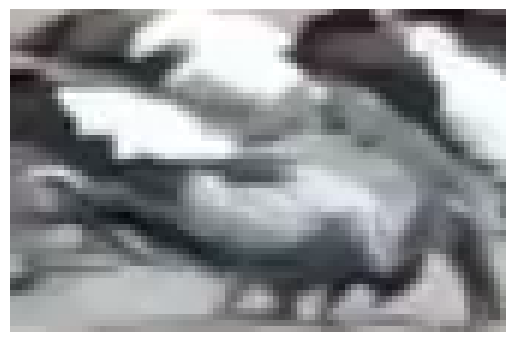


Predicted Label: Demoiselle Crane
Confidence: 18.928982317447662%


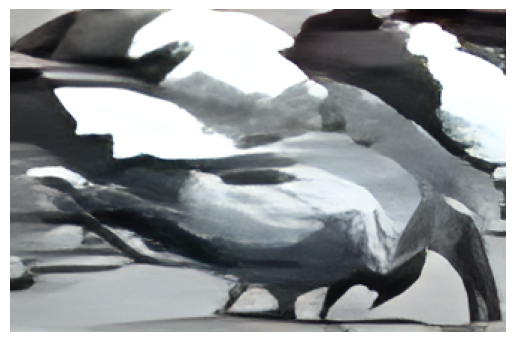



Predicted Label: Snow Goose
Confidence: 8.669103682041168%


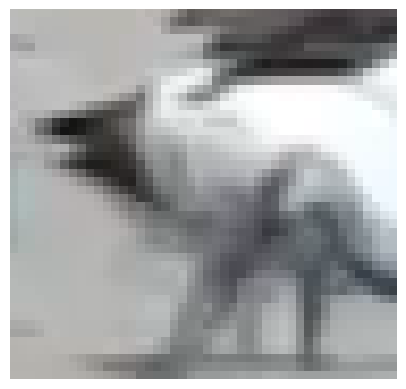


Predicted Label: Demoiselle Crane
Confidence: 20.869363844394684%


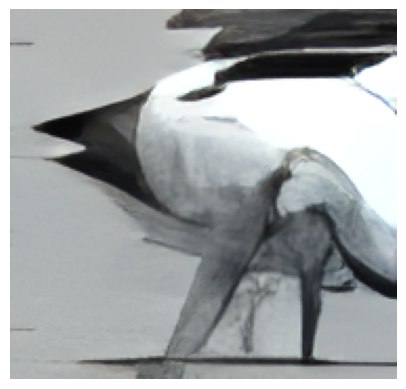



Time consumed : 69.3238844871521


In [ ]:
import time
for frame in iterator:
  frame_num = frame_num + 1
  start = time.time()
  # model prediction on single frame and conversion to supervision Detections
  results = model(frame)
  print(f"\n\nTHIS IS FRAME {frame_num}")
  image = frame
  a=0

  for result in results:
      # Iterate over each detection in the inner list

      for detection in result:
          frame = image
          detections = Detections(
          xyxy=detection.boxes.xyxy.cpu().numpy(),
          confidence=detection.boxes.conf.cpu().numpy(),
          class_id=detection.boxes.cls.cpu().numpy().astype(int)
          )
          # Extract the bounding box coordinates of each detection
          boxes = detection.boxes.xyxy.cpu().numpy()

          # Iterate over each bounding box
          # for box in boxes:

          #     # Print the bounding box coordinates
          #     x1, y1, x2, y2 = box[0], box[1], box[2], box[3]
          #     print(f"Bounding Box: ({x1}, {y1}, {x2}, {y2})")
          # # format custom labels
          labels = [
              f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
              for _, confidence, class_id, tracker_id
              in detections
          ]
          frame = frame[int(result[a].boxes.xyxy.cpu().numpy()[0][1]):int(result[a].boxes.xyxy.cpu().numpy()[0][3]),int(result[a].boxes.xyxy.cpu().numpy()[0][0]):int(result[a].boxes.xyxy.cpu().numpy()[0][2])]
          frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

          a=a+1


          # DATASET_DIR = '/content'
          # dataset = load_dataset(path=DATASET_DIR, data_files={"test": "/content/test/**"})

          # image = dataset["test"]["image"][0]

          model_path = "/content/Bird/swin"


          image_processor = AutoImageProcessor.from_pretrained(model_path)
          model2 = Swinv2ForImageClassification.from_pretrained(model_path)

          inputs = image_processor(frame, return_tensors="pt")

          with torch.no_grad():
              logits = model2(**inputs).logits

          predicted_label = logits.argmax(-1).item()
          predicted_probabilities = torch.softmax(logits, dim=-1)[0]
          confidence = predicted_probabilities[predicted_label].item() * 100

          print(f"Predicted Label: {model2.config.id2label[predicted_label]}")
          print(f"Confidence: {confidence}%")
          plt.imshow(frame)
          plt.axis('off')
          plt.show()
          print("")
          name_img = str(a) +".png"
          try:
              enhanced_frame = Enhance.predict(frame,int(4))
              inputs = image_processor(enhanced_frame, return_tensors="pt")

              with torch.no_grad():
                  logits = model2(**inputs).logits

              predicted_label = logits.argmax(-1).item()
              predicted_probabilities = torch.softmax(logits, dim=-1)[0]
              confidence = predicted_probabilities[predicted_label].item() * 100
              print(f"Predicted Label: {model2.config.id2label[predicted_label]}")
              print(f"Confidence: {confidence}%")
              plt.imshow(enhanced_frame)
              plt.axis('off')
              plt.show()

          except Exception as e:
              print("An error occurred:", str(e))
          print("\n")


  end = time.time()
  print("Time consumed : "+str(end-start))
  break





In [ ]:
import cv2
import numpy as np
import supervision
import ultralytics
import torch
import matplotlib.pyplot as plt

ultralytics.checks()

from cv2 import dnn_superres

from ultralytics import YOLO

from supervision.draw.color import ColorPalette
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator
from supervision.video.source import get_video_frames_generator
from supervision.notebook.utils import show_frame_in_notebook

from transformers import AutoImageProcessor, Swinv2ForImageClassification
from datasets import load_dataset
import pandas as pd
from google.colab.patches import cv2_imshow

%cd "/content"
SOURCE_VIDEO_PATH = "/content/bird.mp4"
MODEL = "best78.pt"


model = YOLO(MODEL)
model.fuse()

box_annotator = BoxAnnotator(color=ColorPalette(), thickness=3, text_thickness=3, text_scale=1)
CLASS_NAMES_DICT = model.model.names

generator = get_video_frames_generator(SOURCE_VIDEO_PATH)

# acquire first video frame
iterator = iter(generator)
frame_num = 0
for frame in iterator:
  frame_num = frame_num + 1

  # model prediction on single frame and conversion to supervision Detections
  results = model(frame)
  print(f"\n\nTHIS IS FRAME {frame_num}")
  image = frame
  a=0

  for result in results:
      # Iterate over each detection in the inner list

      for detection in result:
          frame = image
          detections = Detections(
          xyxy=detection.boxes.xyxy.cpu().numpy(),
          confidence=detection.boxes.conf.cpu().numpy(),
          class_id=detection.boxes.cls.cpu().numpy().astype(int)
          )
          # Extract the bounding box coordinates of each detection
          boxes = detection.boxes.xyxy.cpu().numpy()

          # Iterate over each bounding box
          # for box in boxes:

          #     # Print the bounding box coordinates
          #     x1, y1, x2, y2 = box[0], box[1], box[2], box[3]
          #     print(f"Bounding Box: ({x1}, {y1}, {x2}, {y2})")
          # # format custom labels
          labels = [
              f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
              for _, confidence, class_id, tracker_id
              in detections
          ]
          frame = frame[int(result[a].boxes.xyxy.cpu().numpy()[0][1]):int(result[a].boxes.xyxy.cpu().numpy()[0][3]),int(result[a].boxes.xyxy.cpu().numpy()[0][0]):int(result[a].boxes.xyxy.cpu().numpy()[0][2])]
          frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
          img_path = "/content/test/image.png"

          a=a+1


          # DATASET_DIR = '/content'
          # dataset = load_dataset(path=DATASET_DIR, data_files={"test": "/content/test/**"})

          # image = dataset["test"]["image"][0]

          model_path = "/content/swin"


          image_processor = AutoImageProcessor.from_pretrained(model_path)
          model2 = Swinv2ForImageClassification.from_pretrained(model_path)


          inputs = image_processor(frame, return_tensors="pt")

          with torch.no_grad():
              logits = model2(**inputs).logits

          predicted_label = logits.argmax(-1).item()
          predicted_probabilities = torch.softmax(logits, dim=-1)[0]
          confidence = predicted_probabilities[predicted_label].item() * 100

          print(f"Predicted Label: {model2.config.id2label[predicted_label]}")
          print(f"Confidence: {confidence}%")
          plt.imshow(frame)
          plt.axis('off')  # Disable axes
          plt.show()
          print("")
          name_img = str(a) +".png"
          plt.savefig(name_img)
          plt.close()


  break





In [ ]:
import argparse
import cv2
import glob
import os
from basicsr.archs.rrdbnet_arch import RRDBNet
from basicsr.utils.download_util import load_file_from_url

from realesrgan import RealESRGANer
from realesrgan.archs.srvgg_arch import SRVGGNetCompact


def main(input_path, model_name='RealESRGAN_x4plus', output_folder='results',
                              denoise_strength=0.5, outscale=4, model_path=None, suffix='out', tile=0,
                              tile_pad=10, pre_pad=0, face_enhance=False, fp32=False, alpha_upsampler='realesrgan',
                              ext='auto', gpu_id=None):
    """Inference demo for Real-ESRGAN.
    """
    parser = argparse.ArgumentParser()
    parser.add_argument('-i', '--input', type=str, default='inputs', help='Input image or folder')
    parser.add_argument(
        '-n',
        '--model_name',
        type=str,
        default='RealESRGAN_x4plus',
        help=('Model names: RealESRGAN_x4plus | RealESRNet_x4plus | RealESRGAN_x4plus_anime_6B | RealESRGAN_x2plus | '
              'realesr-animevideov3 | realesr-general-x4v3'))
    parser.add_argument('-o', '--output', type=str, default='results', help='Output folder')
    parser.add_argument(
        '-dn',
        '--denoise_strength',
        type=float,
        default=0.5,
        help=('Denoise strength. 0 for weak denoise (keep noise), 1 for strong denoise ability. '
              'Only used for the realesr-general-x4v3 model'))
    parser.add_argument('-s', '--outscale', type=float, default=4, help='The final upsampling scale of the image')
    parser.add_argument(
        '--model_path', type=str, default=None, help='[Option] Model path. Usually, you do not need to specify it')
    parser.add_argument('--suffix', type=str, default='out', help='Suffix of the restored image')
    parser.add_argument('-t', '--tile', type=int, default=0, help='Tile size, 0 for no tile during testing')
    parser.add_argument('--tile_pad', type=int, default=10, help='Tile padding')
    parser.add_argument('--pre_pad', type=int, default=0, help='Pre padding size at each border')
    parser.add_argument('--face_enhance', action='store_true', help='Use GFPGAN to enhance face')
    parser.add_argument(
        '--fp32', action='store_true', help='Use fp32 precision during inference. Default: fp16 (half precision).')
    parser.add_argument(
        '--alpha_upsampler',
        type=str,
        default='realesrgan',
        help='The upsampler for the alpha channels. Options: realesrgan | bicubic')
    parser.add_argument(
        '--ext',
        type=str,
        default='auto',
        help='Image extension. Options: auto | jpg | png, auto means using the same extension as inputs')
    parser.add_argument(
        '-g', '--gpu-id', type=int, default=None, help='gpu device to use (default=None) can be 0,1,2 for multi-gpu')

    args = parser.parse_args(['--input', input_path, '--model_name', model_name, '--output', output_folder,
                              '--denoise_strength', str(denoise_strength), '--outscale', str(outscale),
                              '--model_path', model_path, '--suffix', suffix, '--tile', str(tile),
                              '--tile_pad', str(tile_pad), '--pre_pad', str(pre_pad), '--face_enhance',
                              '--fp32' if fp32 else '', '--alpha_upsampler', alpha_upsampler, '--ext', ext,
                              '--gpu-id', str(gpu_id)])

    # determine models according to model names
    args.model_name = args.model_name.split('.')[0]
    if args.model_name == 'RealESRGAN_x4plus':  # x4 RRDBNet model
        model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
        netscale = 4
        file_url = ['https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth']
    elif args.model_name == 'RealESRNet_x4plus':  # x4 RRDBNet model
        model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
        netscale = 4
        file_url = ['https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.1/RealESRNet_x4plus.pth']
    elif args.model_name == 'RealESRGAN_x4plus_anime_6B':  # x4 RRDBNet model with 6 blocks
        model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=6, num_grow_ch=32, scale=4)
        netscale = 4
        file_url = ['https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.2.4/RealESRGAN_x4plus_anime_6B.pth']
    elif args.model_name == 'RealESRGAN_x2plus':  # x2 RRDBNet model
        model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=2)
        netscale = 2
        file_url = ['https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.1/RealESRGAN_x2plus.pth']
    elif args.model_name == 'realesr-animevideov3':  # x4 VGG-style model (XS size)
        model = SRVGGNetCompact(num_in_ch=3, num_out_ch=3, num_feat=64, num_conv=16, upscale=4, act_type='prelu')
        netscale = 4
        file_url = ['https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.5.0/realesr-animevideov3.pth']
    elif args.model_name == 'realesr-general-x4v3':  # x4 VGG-style model (S size)
        model = SRVGGNetCompact(num_in_ch=3, num_out_ch=3, num_feat=64, num_conv=32, upscale=4, act_type='prelu')
        netscale = 4
        file_url = [
            'https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.5.0/realesr-general-wdn-x4v3.pth',
            'https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.5.0/realesr-general-x4v3.pth'
        ]

    # determine model paths
    if args.model_path is not None:
        model_path = args.model_path
    else:
        model_path = os.path.join('weights', args.model_name + '.pth')
        if not os.path.isfile(model_path):
            ROOT_DIR = os.path.dirname(os.path.abspath(__file__))
            for url in file_url:
                # model_path will be updated
                model_path = load_file_from_url(
                    url=url, model_dir=os.path.join(ROOT_DIR, 'weights'), progress=True, file_name=None)

    # use dni to control the denoise strength
    dni_weight = None
    if args.model_name == 'realesr-general-x4v3' and args.denoise_strength != 1:
        wdn_model_path = model_path.replace('realesr-general-x4v3', 'realesr-general-wdn-x4v3')
        model_path = [model_path, wdn_model_path]
        dni_weight = [args.denoise_strength, 1 - args.denoise_strength]

    # restorer
    upsampler = RealESRGANer(
        scale=netscale,
        model_path=model_path,
        dni_weight=dni_weight,
        model=model,
        tile=args.tile,
        tile_pad=args.tile_pad,
        pre_pad=args.pre_pad,
        half=not args.fp32,
        gpu_id=args.gpu_id)

    if args.face_enhance:  # Use GFPGAN for face enhancement
        from gfpgan import GFPGANer
        face_enhancer = GFPGANer(
            model_path='https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth',
            upscale=args.outscale,
            arch='clean',
            channel_multiplier=2,
            bg_upsampler=upsampler)
    os.makedirs(args.output, exist_ok=True)

    if os.path.isfile(args.input):
        paths = [args.input]
    else:
        paths = sorted(glob.glob(os.path.join(args.input, '*')))

    for idx, path in enumerate(paths):
        imgname, extension = os.path.splitext(os.path.basename(path))
        print('Testing', idx, imgname)

        img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        if len(img.shape) == 3 and img.shape[2] == 4:
            img_mode = 'RGBA'
        else:
            img_mode = None

        try:
            if args.face_enhance:
                _, _, output = face_enhancer.enhance(img, has_aligned=False, only_center_face=False, paste_back=True)
            else:
                output, _ = upsampler.enhance(img, outscale=args.outscale)
        except RuntimeError as error:
            print('Error', error)
            print('If you encounter CUDA out of memory, try to set --tile with a smaller number.')
        else:
            if args.ext == 'auto':
                extension = extension[1:]
            else:
                extension = args.ext
            if img_mode == 'RGBA':  # RGBA images should be saved in png format
                extension = 'png'
            if args.suffix == '':
                save_path = os.path.join(args.output, f'{imgname}.{extension}')
            else:
                save_path = os.path.join(args.output, f'{imgname}_{args.suffix}.{extension}')
            cv2.imwrite(save_path, output)